In [2]:
#Limb darkening of WASP-17b

In [3]:
import batman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck


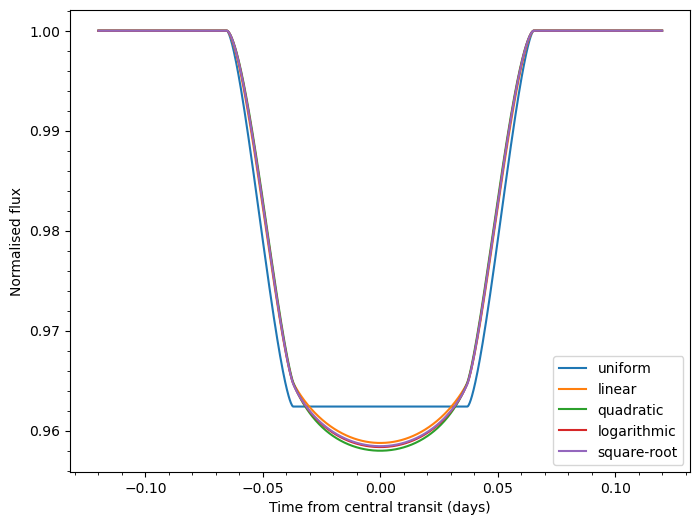

In [4]:
R_star = 1.2 #R_sun
R_planet = 1.93 #R_J
semi_major_axis = 0.04994 #AU 


params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 3.41                       #orbital period
params.rp = R_planet * 0.10045 #R_Sun       #planet radius (in units of stellar radii)
params.a = (semi_major_axis * 215.032) / R_star #semi-major axis (in units of stellar radii))
params.inc = 86.63                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.12, 0.12, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model


#QUADRATIC - https://www.aanda.org/articles/aa/pdf/2010/02/aa13675-09.pdf
#LDC came from https://articles.adsabs.harvard.edu/pdf/1993AJ....106.2096V

ld_options = ["uniform", "linear", "quadratic" , "logarithmic", "squareroot"]
labels = ["uniform", "linear", "quadratic" , "logarithmic", "square-root"]
ld_coefficients = [[], [0.478], [0.3423, 0.2939] , [0.639, 0.241], [0.116, 0.603]]

fig, ax = plt.subplots(1,figsize=(8,6))

for i in range(5):
        params.limb_dark = ld_options[i]          #specifies the LD profile
        params.u = ld_coefficients[i]             #updates LD coefficients
        m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = labels[i])
# plt.title("Varying limb-darkening profiles")
plt.xlabel("Time from central transit (days)")
plt.ylabel("Normalised flux")
plt.legend(loc='lower right')

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

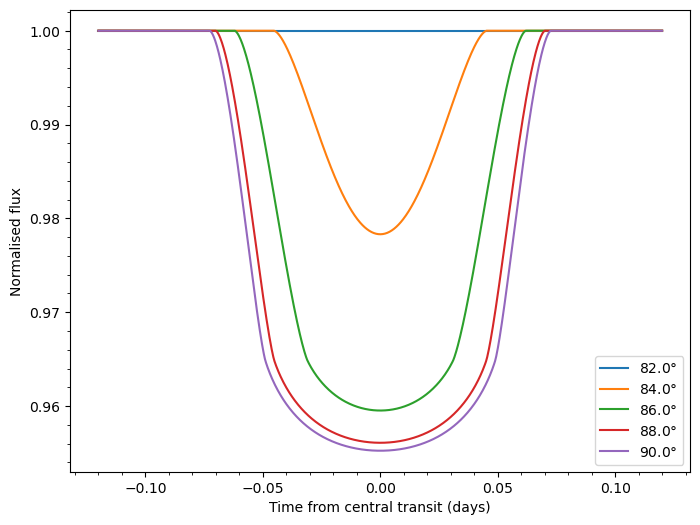

In [5]:
R_star = 1.2 #R_sun
R_planet = 1.93 #R_J
semi_major_axis = 0.04994 #AU 


params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 3.41                       #orbital period
params.rp = R_planet * 0.10045 #R_Sun       #planet radius (in units of stellar radii)
params.a = (semi_major_axis * 215.032) / R_star #semi-major axis (in units of stellar radii))
params.inc = 86.63                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.3423, 0.2939]     #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.12, 0.12, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model


fig, ax = plt.subplots(1, figsize=(8,6))

for params.inc in [82.0, 84.0, 86.0, 88.0, 90.0]:
        m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label="{}$\degree$".format(str(params.inc)))
# plt.title("Varying limb-darkening profiles")
plt.xlabel("Time from central transit (days)")
plt.ylabel("Normalised flux")
plt.legend(loc='lower right')

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()